In [1]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
spam_file = 'spam_data.txt'
ham_file = 'ham_data.txt'

In [3]:
def load_data(file):
    with open(file, 'r', encoding='utf-8') as f:
        data = f.read().splitlines()
    return data

In [4]:
spam_data = load_data(spam_file)
ham_data = load_data(ham_file)

In [5]:
def tokenize(text):
    return ' '.join(jieba.cut(text))

In [6]:
spam_data = [tokenize(text) for text in spam_data]
ham_data = [tokenize(text) for text in ham_data]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\15022\AppData\Local\Temp\jieba.cache
Loading model cost 1.287 seconds.
Prefix dict has been built successfully.


In [7]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(spam_data + ham_data)
transformer = TfidfTransformer()
X = transformer.fit_transform(X)

In [10]:
y = [1] * len(spam_data) + [0] * len(ham_data)

In [8]:
acu=[]
l=[]
c=[]

In [11]:
for i in range(99):
    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(i+1)/100, random_state=21)
    # 训练朴素贝叶斯模型
    model = MultinomialNB()
    model.fit(X_train, y_train)
    # 在测试集上进行预测
    y_pred = model.predict(X_test)
    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    
    loss = log_loss(y_test, model.predict_proba(X_test))
    acu+=[accuracy*100]
    l+=[loss]
    c+=[i]
acu=list(reversed(acu))
l=list(reversed(l))

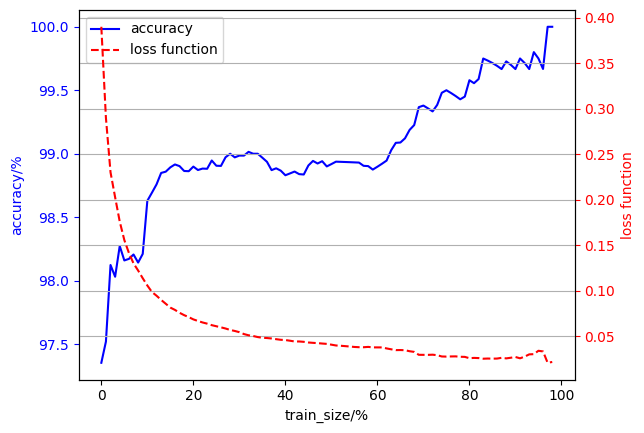

In [12]:
fig, ax1 = plt.subplots()
ax1.plot(c,acu,label='accuracy',color='b')
ax1.set_xlabel('train_size/%')
ax1.set_ylabel('accuracy/%', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()

ax2.plot(c, l, 'r--', label='loss function')
ax2.set_ylabel('loss function', color='r')
ax2.tick_params('y', colors='r')


lines = [ax1.get_lines()[0], ax2.get_lines()[0]]
ax1.legend(lines, [line.get_label() for line in lines])
plt.grid()
plt.show()